# `STEP.1` Import all the required `packages`


In [1]:
# If you have not install these packages simply write
# !pip install tensorflow
# !pip install matplotlib
# !pip install IPython
# !pip install opencv


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# `Step.2`  Importing the datset using tensorlfow api 

Here we have data devided in  three subfolders Names present in our working directory....
 1. `Train_dataset`
 2. `val_dataset`
 3. `test_dataset` 
 

# Import data into tensorflow dataset object

`I make three subfolders for training ,, validation,, and testing purposes...`

# `processing` the` training data...`

In [3]:
IMAGE_SIZE = 256    # 500,400
CHANNELS   =3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAIN_DATA_GEN = ImageDataGenerator(
                rescale   = 1./255,
                rotation_range=10,
                horizontal_flip=True
                )


TRAIN_GENERATOR = TRAIN_DATA_GEN.flow_from_directory(
                   "Train_dataset",
                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                   batch_size=32,
                   class_mode="sparse"            

                   )




Found 2199 images belonging to 2 classes.


In [5]:
TRAIN_GENERATOR.class_indices

{'Defect': 0, 'Good': 1}

In [6]:
# these are our classes names...

In [7]:
CLASS_NAMES = list(TRAIN_GENERATOR.class_indices.keys())
CLASS_NAMES

['Defect', 'Good']

(256, 256, 3)


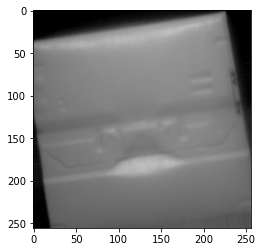

In [11]:
COUNT=0
for IMAGE_BATCH,LABEL_BATCH in TRAIN_GENERATOR:
    first_image=IMAGE_BATCH[0]
    print(first_image.shape)
    plt.imshow(first_image)
    
    break
  


# `processing` the `validation data...`

In [14]:
VALIDATION_DATA_GEN = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
VALIDATION_GENERATION = VALIDATION_DATA_GEN.flow_from_directory(
        'val_dataset',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 320 images belonging to 2 classes.


# preprocessing the test data...

In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'test_dataset',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 355 images belonging to 2 classes.


In [14]:
for image_batch, label_batch in test_generator:
    f_img=image_batch[0]
    print(f_img.shape)
    break

(256, 256, 3)


# ` Now upto here our data processing process have been completed now is the step to Building model...`

# `Step.3`  `Building the Model`

In [17]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2    #  defect and good beverages  are the two classes....


In [18]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

# `Compiling the Model`
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Step.5  `Fitting` our model on given `test_dataset Images`


In [21]:
history = model.fit(
    TRAIN_GENERATOR,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=VALIDATION_GENERATION,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10
47/47 [==============================] - 247s 5s/step - loss: 0.3709 - accuracy: 0.8455 - val_loss: 0.0221 - val_accuracy: 0.9948
Epoch 2/10
47/47 [==============================] - 152s 3s/step - loss: 0.2376 - accuracy: 0.9362 - val_loss: 0.0262 - val_accuracy: 0.9740
Epoch 3/10
47/47 [==============================] - 148s 3s/step - loss: 0.0527 - accuracy: 0.9887 - val_loss: 0.0430 - val_accuracy: 0.9740
Epoch 4/10
47/47 [==============================] - 127s 3s/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 116s 2s/step - loss: 0.0586 - accuracy: 0.9893 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 116s 2s/step - loss: 0.0280 - accuracy: 0.9953 - val_loss: 0.0265 - val_accuracy: 0.9948
Epoch 7/10
47/47 [==============================] - 118s 3s/step - loss: 0.0276 - accuracy: 0.9933 - val_loss: 0.0383 - val_accuracy: 0.9792
Epoch 8/10
47

In [22]:
scores = model.evaluate(test_generator)

12/12 [==============================] - 17s 1s/step - loss: 0.0070 - accuracy: 0.9972


In [23]:
scores

[0.006974092684686184, 0.997183084487915]

`Scores` is just a list containing `loss` and `accuracy` value
`Loss`= `0.044505443423986435`
`accuracy` = `0.9802817106246948`

# Step.6 `Plotting` the `Accuracy` and` Loss Curves`

You can read `documentation` on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [24]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 47}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

`loss`, `accuracy`, val loss etc are a `python list` containing values of loss, `accuracy` etc at the end of each `epochs`

In [26]:
type(history.history['loss'])

list

In [27]:
len(history.history['loss'])

10

In [28]:
history.history['loss'][:5]   # show loss for first 5 epochs

[0.37092941999435425,
 0.23761919140815735,
 0.052711933851242065,
 0.03393392637372017,
 0.058574575930833817]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [30]:
val_acc

[0.9947916865348816,
 0.9739583134651184,
 0.9739583134651184,
 1.0,
 1.0,
 0.9947916865348816,
 0.9791666865348816,
 1.0,
 1.0,
 1.0]

In [31]:
acc

[0.8454849720001221,
 0.936170220375061,
 0.988696813583374,
 0.9906354546546936,
 0.9892976880073547,
 0.9953176975250244,
 0.9933110475540161,
 0.9953457713127136,
 0.9940159320831299,
 0.9953176975250244]

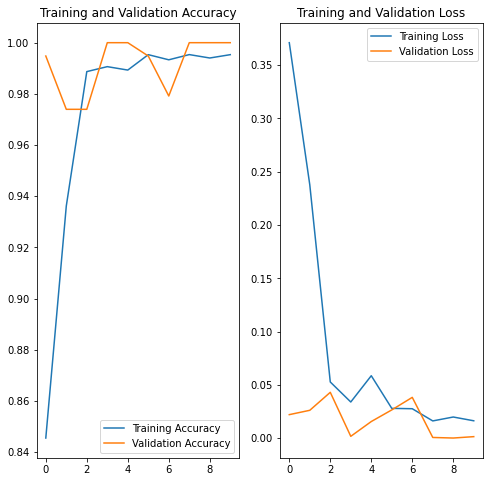

In [32]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# STEP NO:7-->

 # STEP.7  Run `prediction` on a `test_dataset_image`

first image to predict
actual label: Good
predicted label: Good


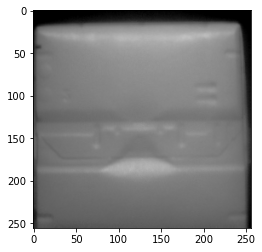

In [33]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",CLASS_NAMES[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",CLASS_NAMES[np.argmax(batch_prediction[0])])
    
    break

# Write a function for inference


In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# **Now run inference on few sample images**

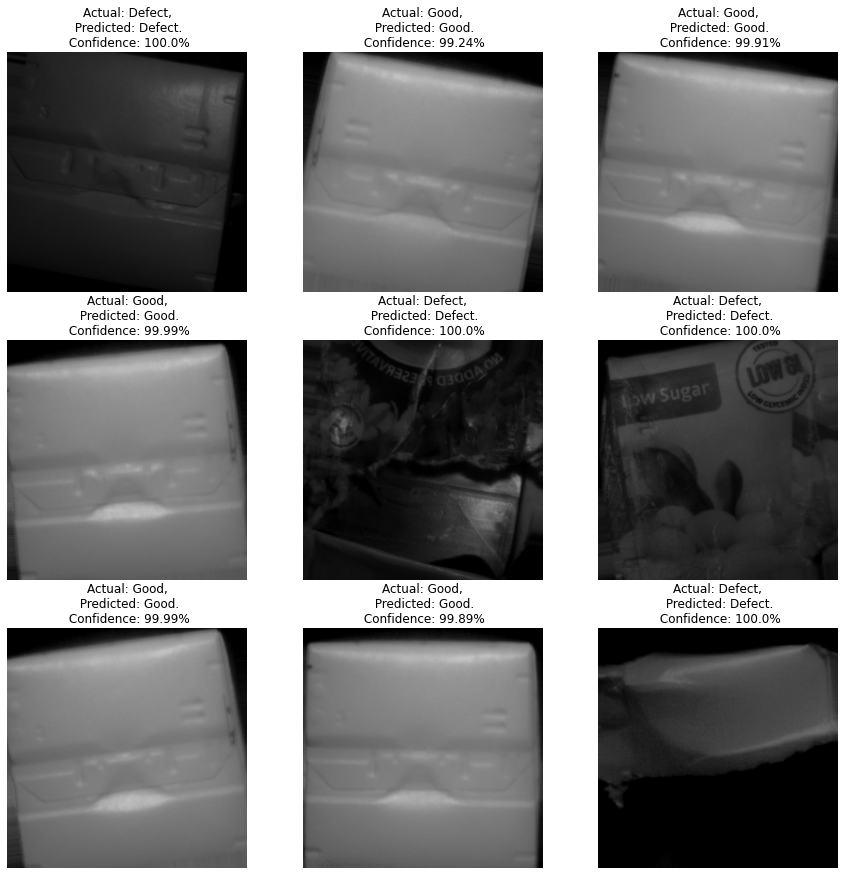

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = CLASS_NAMES[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

you can see in the prediction our model is working with superb `accuracy`
OOoohh Finally we completed our cool project

# `Last_Step_8`  `Saving the model...`

# Saving the Model

Save model in `h5 format` so that there is just one file and we can upload that to GCP conveniently

In [36]:
model.save("../CNN_detection.h5")